Este Notebook é parte da <b>Data Scientist with Python Career Track</b> da plataforma DataCamp<br>
Além das resoluções, este notebook pode conter outras análises e modificações realizadas por mim.<br>
<hr/>

#  <font color='red'> A história do GitHub da linguagem Scala<hr>

# Análise Guiada 

## 1. Dados do repositório de projetos do mundo real do Scala<br>
Com quase 30 mil commits e um histórico de mais de dez anos, Scala é uma linguagem de programação madura. É uma linguagem de programação de uso geral que recentemente se tornou outra linguagem proeminente para cientistas de dados.<br>

Scala também é um projeto de código aberto. Projetos de código aberto têm a vantagem de que todo o histórico de desenvolvimento - quem fez as alterações, o que foi alterado, revisões de código, etc. - estão disponíveis publicamente.<br>

Vamos ler, limpar e visualizar o repositório de projetos do mundo real do Scala que abrange dados de um sistema de controle de versão (Git) e de um site de hospedagem de projetos (GitHub). Descobriremos quem teve mais influência em seu desenvolvimento e quem são os especialistas.<b>

O conjunto de dados que usaremos, previamente minerado e extraído do GitHub, é composto por três arquivos:

* `pulls_2011-2013.csv` contém as informações básicas sobre as solicitações de pull e abrange desde o final de 2011 até (mas não incluindo) 2014.
* `pulls_2014-2018.csv` contém informações idênticas e abrange de 2014 a 2018.
* `pull_files.csv` contém os arquivos que foram modificados por cada pull request.

### Dicionário de dados

pid:
user:
date:
file:

### Importando bibliotecas, carregando e visualizando os datasets

In [1]:
# Importando Biliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados

pulls_one = pd.read_csv('Datasets/pulls_2011-2013.csv', sep=',')
pulls_two = pd.read_csv('Datasets/pulls_2014-2018.csv', sep=',')
pulls = pd.read_csv('Datasets/pulls.csv', sep=',') 
pulls_files = pd.read_csv('Datasets/pull_files.csv', sep=',')

In [3]:
# Visualizando 5 amostras de cada dataset

print(pulls_one.sample(5))
print(pulls_two.sample(5))
print(pulls_files.sample(5))

          pid          user                  date
401   8108144      retronym  2013-09-05T15:08:06Z
654   6366721  gkossakowski  2013-06-17T18:30:23Z
1167  4212311   viktorklang  2013-02-19T16:28:04Z
917   5160486      retronym  2013-04-15T11:42:59Z
2042  2247892  Blaisorblade  2012-09-05T04:37:32Z
           pid         user                  date
2261  21232895  gourlaysama  2014-09-15T13:48:25Z
2026  26811783    som-snytt  2015-01-05T08:43:11Z
946   79820836         m0xb  2016-08-02T22:34:39Z
2220  22215275       dragos  2014-10-03T16:53:40Z
2648  12889197     adriaanm  2014-02-25T05:33:47Z
            pid                                               file
63745   2620111  src/reflect/scala/reflect/api/StandardNames.scala
14779  59031965                  src/library/scala/Product19.scala
13178  66340541  test/instrumented/library/scala/runtime/BoxesR...
19664  40006511  src/reflect/scala/reflect/internal/transform/E...
66308   2373379  src/compiler/scala/tools/nsc/backend/icode/Gen..

## 2. Preparação e limpeza dos dados<br>

Primeiro, precisaremos combinar os dados dos dois DataFrames pull separados.<br>

Em seguida, os dados brutos extraídos do GitHub contêm datas no formato ISO8601. No entanto, os pandas os importam como strings regulares. Para facilitar nossa análise, precisamos converter as strings em objetos DateTime do Python. Os objetos DateTime têm a propriedade importante de que podem ser comparados e classificados.<br>

Os tempos de solicitação de pull estão todos em UTC (também conhecido como Tempo Universal Coordenado). Os tempos de confirmação, no entanto, estão na hora local do autor com informações de fuso horário (número de horas de diferença do UTC). Para facilitar as comparações, devemos converter todos os horários para UTC.<br>

# Combinando os datasets

In [4]:
# Utilizando método concat do pandas para combinar os dois datasets
# Os argumentos utilizados garantem que o index será ignorado e uma nova ordem de index será gerada, além da verificação de integridade
# que evitará valores do índice duplicados.

pull = pulls = pd.concat([pulls_one,pulls_two],ignore_index=True, verify_integrity=True)
pull.head(5)

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


### Convertendo o tipo de dados

In [5]:
# Utilizando o método do to_datetime do pandas para converter os dados da coluna Date para o formato datetime
# O argumento utilizado utc=True permitirá que os horários sejam convertidos para o mesmo fuso horário, assim facilitará a comparação

pulls['date'] = pd.to_datetime(pulls['date'], utc=True)
pulls.head(5)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


## 3. Mesclando os DataFrames

Os dados extraídos vêm em dois arquivos separados. A fusão dos dois DataFrames facilitará a análise dos dados nas tarefas futuras.

In [6]:
# Utilizando o método merge() do pandas para mesclar os dois dataframe
data = pulls.merge(pulls_files, on=['pid'])
data.head(5)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## 4. O projeto ainda é mantido ativamente?

A atividade em um projeto de código aberto não é muito consistente. Alguns projetos podem ficar ativos por muitos anos após o lançamento inicial, enquanto outros podem cair lentamente no esquecimento. Antes de se comprometer a contribuir para um projeto, é importante entender o estado do projeto. O desenvolvimento está indo de forma constante ou há uma queda? O projeto foi totalmente abandonado?<br>

Os dados utilizados neste projeto foram coletados em janeiro de 2018. Estamos interessados ​​na evolução do número de contribuições até essa data.<br>

Para Scala, faremos isso traçando um gráfico da atividade do projeto. Calcularemos o número de solicitações pull enviadas a cada mês (calendário) durante a vida útil do projeto. Em seguida, plotaremos esses números para ver a tendência das contribuições.<br>

In [7]:
# Extraindo o mês da coluna date e criando uma nova coluna chamada month
data['month'] = data['date'].dt.month

# Fazendo a mesma coisa para o ano
data['year'] = data['date'].dt.year

# Agrupando os dados por ano e mês e fazendo a contagem dos pull requests
# Diferente do proposto pelo guia, optei pelo agrupamento ano-mês para uma melhor visualização
counts = data.groupby(['year', 'month'])['pid'].count()

print(counts)

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64


<AxesSubplot:xlabel='year,month'>

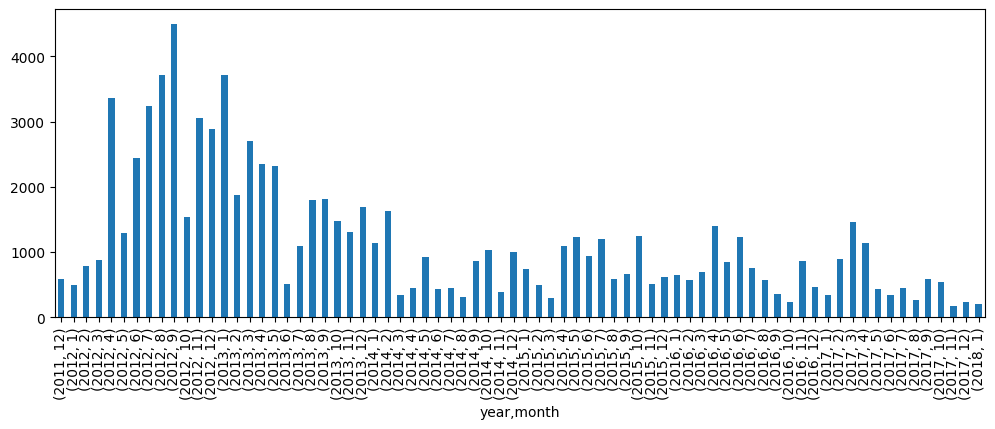

In [8]:
%matplotlib inline
# Plotando resultado

counts.plot(kind='bar', figsize = (12,4))
# Existem outras formas de fazer o gráfico de barra, que serão explorados de forma mais livre mais para frente, mas para esse exercício foi
# seguido conforme proposta do guia.

É possível observar que o projeto se mantém ativo, mas que ao longo do periodo sofreu uma diminuiu significativa os pull requests recebidos.

## 5. Existe camaradagem no projeto?

A estrutura organizacional varia de um projeto para outro e pode influenciar seu sucesso como colaborador. Um projeto que tem uma comunidade muito pequena pode não ser o melhor para começar a trabalhar. A pequena comunidade pode indicar uma alta barreira de entrada. Isso pode ser causado por vários fatores, incluindo uma comunidade que está relutante em aceitar pull requests de "outsiders", que a base de código é difícil de trabalhar, etc. No entanto, uma grande comunidade pode servir como um indicador de que o projeto estpa regularmente aceitando pull requests de novos contribuidores. Tal projeto seria um bom lugar para começar.<br>

Para avaliar a dinâmica da comunidade, traçaremos um histograma do número de pull requests enviados por cada usuário. Uma distribuição que mostra que há poucas pessoas que contribuem apenas com um pequeno número de pull requests pode ser usada como indicador de que o projeto não está recebendo novos contribuidores.

In [9]:
# Agrupando a contagem de pull requests por usuário
by_user = data.groupby('user')['pid'].count()

print(by_user)

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64


<AxesSubplot:ylabel='Frequency'>

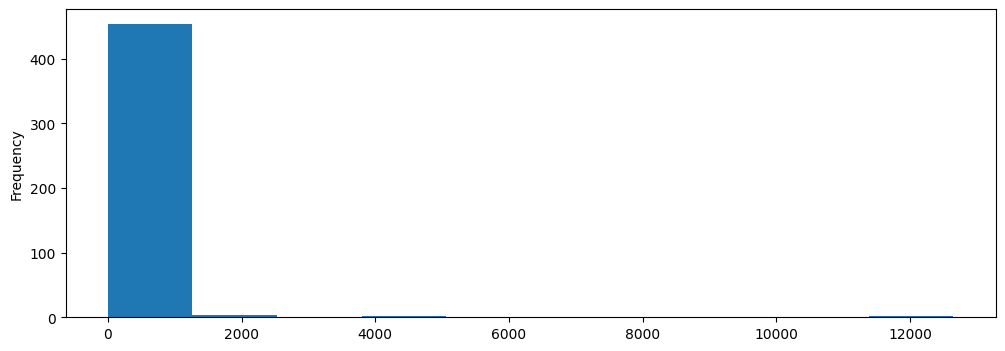

In [10]:
%matplotlib inline

# Plotando um histograma
by_user.plot(kind='hist', figsize = (12,4))

## 6. Quais arquivos foram alterados nas últimas dez pull requests?

Escolher o lugar certo para fazer uma contribuição é tão importante quanto escolher o projeto para o qual contribuir. Algumas partes do código podem ser estáveis, outras podem estar mortas. Contribuir lá pode não ter o maior impacto. Portanto, é importante entender as partes do sistema que foram alteradas recentemente. Isso nos permite identificar as áreas "quentes" do código onde a maior parte da atividade está acontecendo. Concentrar-se nessas partes pode não ser o uso mais eficaz de nossos tempos.

In [11]:
# Identificando os 10 últimos pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)
last_10

,pid,user,date
3305,162011899,joroKr21,2018-01-10 00:45:57+00:00
3304,162197834,SethTisue,2018-01-10 18:31:25+00:00
3303,162256029,mkeskells,2018-01-10 23:20:03+00:00
3302,162643301,hrhino,2018-01-12 14:29:49+00:00
3301,162765232,howtonotwin,2018-01-13 04:37:17+00:00
3300,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3299,162985594,lrytz,2018-01-15 15:52:39+00:00
3298,163057333,mkeskells,2018-01-15 23:05:06+00:00
3297,163061502,joroKr21,2018-01-15 23:44:52+00:00
3296,163314316,hrhino,2018-01-16 23:29:16+00:00


In [14]:
# Juntanod com o dataset contendo o arquivo enviado
joined_pr = pulls_files.merge(last_10, on='pid')
joined_pr


,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00
5,163314316,test/files/run/t8348/TableColumnImpl.java,hrhino,2018-01-16 23:29:16+00:00
6,163314316,test/files/run/t8348/Test.scala,hrhino,2018-01-16 23:29:16+00:00
7,163061502,src/library/scala/concurrent/Lock.scala,joroKr21,2018-01-15 23:44:52+00:00
8,163057333,src/compiler/scala/tools/nsc/profile/AsyncHelp...,mkeskells,2018-01-15 23:05:06+00:00
9,163057333,src/compiler/scala/tools/nsc/profile/Profiler....,mkeskells,2018-01-15 23:05:06+00:00


In [15]:
# Identificando arquivos únicos
files = set(joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. Quem fez mais pull requests para um determinado arquivo?

Ao contribuir para um projeto, podemos precisar de alguma orientação. Podemos nos encontrar precisando de algumas informações sobre a base de código. É importante direcionar todas as perguntas para a pessoa certa. Colaboradores de projetos de código aberto geralmente têm outros empregos diários, portanto, seu tempo é limitado. É importante dirigir nossas perguntas para as pessoas certas. Uma maneira de identificar o alvo certo para nossas consultas é usar seu histórico de contribuição.

Identificamos src/compiler/scala/reflect/reify/phases/Calculate.scala como tendo sido alterado recentemente. Estamos interessados nos 3 principais desenvolvedores que alteraram esse arquivo. Esses desenvolvedores são os mais propensos a ter a melhor compreensão do código.

In [20]:
# Atribuindo a uma variável o arquivo de interesse
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identificando os pull requests que modificaram o arquivo
file_pr = data[data['file'] == file]

file_pr.head(10)

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
14970,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
17127,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
19174,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013
19834,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013


In [25]:
# Agrupando pelo user do desenvolvedor e contando a quantidade de pull requests
author_counts = file_pr.groupby('user').count()
author_counts

,pid,date,file,month,year
user,,,,,
bjornregnell,1,1,1,1,1
densh,1,1,1,1,1
gkossakowski,1,1,1,1,1
melloc,1,1,1,1,1
odersky,2,2,2,2,2
paulp,2,2,2,2,2
retronym,5,5,5,5,5
soc,4,4,4,4,4
starblood,1,1,1,1,1


In [26]:
# Visualizando o top 3 desenvolvedores
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


## 8. Quem fez os últimos dez pull requests em um determinado arquivo?

Projetos de código aberto sofrem com a flutuação de membros. Isso torna o problema de encontrar a pessoa certa mais desafiador: a pessoa precisa ter conhecimento e ainda estar envolvida no projeto. Uma pessoa que contribuiu muito no passado pode não estar mais disponível (ou disposta) a ajudar. Para entender melhor, precisamos investigar a história mais recente dessa parte específica do sistema.

Como na tarefa anterior, veremos o histórico de `src/compiler/scala/reflect/reify/phases/Calculate.scala.`

In [ ]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# SSelecionando apenas os pull requests que alteraram nosso arquivo de interesse
file_pr = pulls_files[pulls_files['file'] == fil

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00
...,...,...,...
6195,11244241,folone,2014-01-06 09:07:34+00:00
6196,11240674,clhodapp,2014-01-06 03:52:23+00:00
6197,11234757,xeno-by,2014-01-05 12:23:24+00:00
6198,11231462,rklaehn,2014-01-04 22:42:02+00:00


In [ ]:
# Juntando com o dataframe pulls para obter os dados de usuários
joined_pr = pulls.merge(file_pr, on='pid')
joined_pr

,pid,user,date,file
0,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
1,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
2,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
3,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
4,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
5,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
6,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
7,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
8,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
9,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...


In [ ]:
# Visualizando os usuários dos últimos 10 pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9. Os pull requests de dois desenvolvedores especiais

Agora que identificamos dois contatos potenciais nos projetos, precisamos encontrar a pessoa que esteve mais envolvida no projeto nos últimos tempos. Essa pessoa provavelmente responderá às nossas perguntas. Para cada ano civil, estamos interessados em entender o número de pull requests que os autores enviaram. Isso nos dará uma imagem de alto nível de sua tendência de contribuição para o projeto.

<AxesSubplot:xlabel='date'>

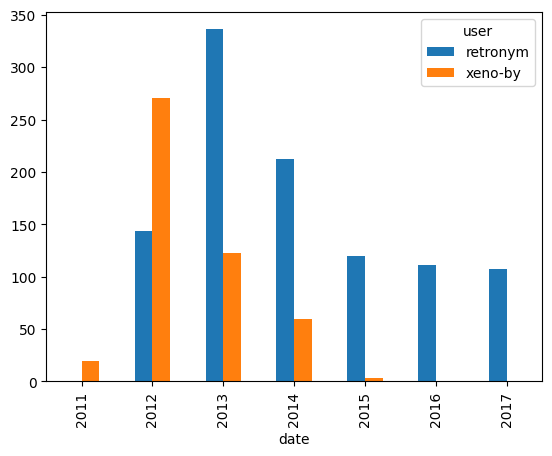

In [40]:
%matplotlib inline

# Desenvolvedores de interesse
authors = ['xeno-by', 'retronym']

# Pull requests por desenvolvedor
by_author = pulls[pulls['user'].isin(authors)]

# Contando o número de pull requests submetidas
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convertendo a tabela para um formato amplo
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Visualização gráfica
counts_wide.plot(kind='bar')

## 10. Visualizando as contribuições de cada desenvolvedor

Como mencionado anteriormente, é importante fazer uma distinção entre a expertise global e os níveis de contribuição e os níveis de contribuição em um nível mais granular (arquivo, submódulo, etc.) No nosso caso, queremos ver qual dos nossos dois desenvolvedores de interesse têm mais experiência com o código em um determinado arquivo. Mediremos a experiência pelo número de solicitações pull enviadas que afetam esse arquivo e quão recentes essas solicitações pull foram enviadas.

<AxesSubplot:xlabel='date'>

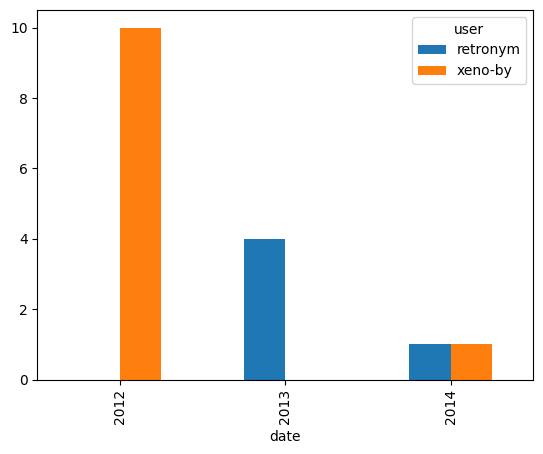

In [43]:
authors = ['xeno-by', 'retronym']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Mesclando DataFrames e selecionando os pull requests do autor
by_author = data[data['user'].isin(authors)]

# Selecionando os pull requests que afetam o arquivo
by_file = by_author[by_author['file'] == file]

# Agrupando e contando o número de PRs feitos por cada usuário a cada ano
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Convertendo a tabela para um formato amplo
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Visualização gráfica
by_file_wide.plot(kind='bar')